# Pre-processing

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv("enter_tech_results.csv")

In [14]:
df.columns

Index(['id_user', 'ds_user_city', 'ds_institution', 'ts_firstaccess',
       'ts_lastaccess', 'n_days_since_firstaccess', 'n_days_since_lastaccess',
       'n_assignments_flagged', 'n_assignments_mapped',
       'n_forum_discussions_posted', 'n_quiz_abandoned', 'n_quiz_finished',
       'vl_avg_quiz_speed', 'vl_avg_graded_quiz_speed', 'vl_quiz_performance',
       'n_interval_using', 'n_days_using', 'vl_avg_daily_activity',
       'vl_user_engagement_by_interval', 'vl_user_engagement_intra_day',
       'n_user_interactions', 'n_days_discussion_engagement',
       'n_days_quiz_engagement', 'n_discussion_engagement',
       'n_quiz_engagement', 'n_questions_answered', 'n_questions_rigth',
       'n_questions_wrong', 'n_questions_partial', 'vl_user_performance',
       'vl_avg_questions_by_day', 'vl_grades_engagement', 'n_items_graded',
       'n_items_not_responded', 'vl_grade_average', 'n_code_submissions',
       'vl_avg_code_submissions', 'vl_submissions_by_days_active'],
      dtype=

In [15]:
df = df.drop(columns=["ds_institution"])

In [16]:
df.ds_user_city.unique()

array(['Passo Fundo', 'Porto Alegre', 'porto alegre', 'Brasília', 'Feliz',
       'Nova Petrópolis', 'Dois Irmãos ', 'Gramado', 'Fortaleza',
       'Fortaleza ', 'fortaleza', 'Fortaleza CE', 'Fortaleza ceará ',
       'Fortaleza ce', 'Passo Fundo ', 'Rio Pardo - RS', 'Blumenau ', nan,
       'Caxias do sul ', 'Lagoa Vermelha/RS', 'Esteio', 'Lagoa Vermelha'],
      dtype=object)

In [17]:
df = df.replace({'ds_user_city': {'porto alegre': 'Porto Alegre', 
                             'Fortaleza ': 'Fortaleza', 
                             'fortaleza': 'Fortaleza',
                             'Fortaleza CE': 'Fortaleza',
                             'Fortaleza ce': 'Fortaleza',
                             'Passo Fundo ': 'Passo Fundo'}})

In [18]:
df.ds_user_city = df.ds_user_city.astype("category")
df.ds_user_city = df.ds_user_city.cat.codes

In [19]:
df["vl_questions_accuracy"] = df.n_questions_rigth / df.n_questions_answered

In [20]:
df["vl_graded_items_engagement"] = df.n_items_graded / df.n_items_not_responded

In [21]:
df = df.fillna(0)

In [22]:
import numpy as np
df.replace([np.inf, -np.inf], 0, inplace=True)

In [23]:
df = df.drop(columns=["id_user", "ts_firstaccess", "ts_lastaccess"])

In [24]:
DROPOUT_RULE = 14
# EARLY_DROPOUT = 5

In [25]:
df['is_dropout'] = df.apply(lambda row: 1 if row.n_days_since_lastaccess > DROPOUT_RULE else 0, axis=1)

In [26]:
# q_low = df["n_days_since_firstaccess"].quantile(0.01)
# q_hi  = df["n_days_since_firstaccess"].quantile(0.99)

# df = df[(df["n_days_since_firstaccess"] < q_hi) & (df["n_days_since_firstaccess"] > q_low)]

In [27]:
# q_low = df["n_days_since_lastaccess"].quantile(0.01)
# q_hi  = df["n_days_since_lastaccess"].quantile(0.9)

# df = df[(df["n_days_since_lastaccess"] < q_hi) & (df["n_days_since_lastaccess"] > q_low)]

In [28]:
# q_low = df["vl_avg_quiz_speed"].quantile(0.01)
# q_hi  = df["vl_avg_quiz_speed"].quantile(0.75)

# df = df[(df["vl_avg_quiz_speed"] < q_hi) & (df["vl_avg_quiz_speed"] > q_low)]

In [29]:
# q_low = df["vl_avg_graded_quiz_speed"].quantile(0.01)
# q_hi  = df["vl_avg_graded_quiz_speed"].quantile(0.75)

# df = df[(df["vl_avg_graded_quiz_speed"] < q_hi) & (df["vl_avg_graded_quiz_speed"] > q_low)]

In [30]:
# q_low = df["n_items_not_responded"].quantile(0.01)
# q_hi  = df["n_items_not_responded"].quantile(0.99)

# df = df[(df["n_items_not_responded"] < q_hi) & (df["n_items_not_responded"] > q_low)]

In [31]:
len(df)

242

In [32]:
df.describe()

ds_user_city  n_days_since_firstaccess  n_days_since_lastaccess  \
count    242.000000                242.000000               242.000000   
mean       9.528926               9847.500000              9828.330579   
std        4.897411               9785.124138              9804.146713   
min       -1.000000                  4.000000                 0.000000   
25%       12.000000                 21.000000                13.000000   
50%       12.000000              10014.000000              9993.000000   
75%       12.000000              19612.000000             19612.000000   
max       14.000000              19612.000000             19612.000000   

       n_assignments_flagged  n_assignments_mapped  \
count             242.000000            242.000000   
mean                0.070248              0.855372   
std                 0.777820              4.653084   
min                 0.000000              0.000000   
25%                 0.000000              0.000000   
50%                 0.000000              0.000000   
75%                 0.000000              0.000000   
max                11.000000             48.000000   

       n_forum_discussions_posted  n_quiz_abandoned  n_quiz_finished  \
count                  242.000000        242.000000       242.000000   
mean                     0.334711          0.037190         1.144628   
std                      2.740422          0.306671         4.178555   
min                      0.000000          0.000000         0.000000   
25%                      0.000000          0.000000         0.000000   
50%                      0.000000          0.000000         0.000000   
75%                      0.000000          0.000000         1.000000   
max                     39.000000          3.000000        46.000000   

       vl_avg_quiz_speed  vl_avg_graded_quiz_speed  ...  vl_grades_engagement  \
count         242.000000                242.000000  ...            242.000000   
mean         7027.829234               8135.001688  ...              0.067839   
std         40534.347371              46460.974724  ...              0.231979   
min             0.000000                  0.000000  ...              0.000000   
25%             0.000000                  0.000000  ...              0.000000   
50%             0.000000                  0.000000  ...              0.000000   
75%            60.250000                 19.500000  ...              0.000000   
max        432769.500000             432769.500000  ...              2.000000   

       n_items_graded  n_items_not_responded  vl_grade_average  \
count      242.000000             242.000000        242.000000   
mean         1.917355              23.995868          0.251246   
std          5.887023              65.704639          0.423196   
min          0.000000               0.000000          0.000000   
25%          0.000000               0.000000          0.000000   
50%          0.000000               0.000000          0.000000   
75%          1.000000              45.250000          0.624709   
max         50.000000             716.000000          1.000000   

       n_code_submissions  vl_avg_code_submissions  \
count          242.000000               242.000000   
mean             0.896694                 0.064397   
std              7.329930                 0.629381   
min              0.000000                 0.000000   
25%              0.000000                 0.000000   
50%              0.000000                 0.000000   
75%              0.000000                 0.000000   
max             84.000000                 7.000000   

       vl_submissions_by_days_active  vl_questions_accuracy  \
count                     242.000000             242.000000   
mean                        0.240823               0.169633   
std                         1.652592               0.322158   
min                         0.000000               0.000000   
25%                         0.000000               0.000000   
50%           

In [33]:
df# df.sample(10)

ds_user_city  n_days_since_firstaccess  n_days_since_lastaccess  \
0              12                       416                        5   
1              13                       416                       10   
2              12                       382                        0   
3              13                       390                        0   
4               1                       383                       21   
..            ...                       ...                      ...   
237            12                     19612                    19612   
238            12                         5                        5   
239            12                     19612                    19612   
240            12                     19612                    19612   
241            12                     19612                    19612   

     n_assignments_flagged  n_assignments_mapped  n_forum_discussions_posted  \
0                        0                     9                           9   
1                        0                     3                          11   
2                        0                     0                           0   
3                        0                    35                           9   
4                       11                    27                           2   
..                     ...                   ...                         ...   
237                      0                     0                           0   
238                      0                     0                           0   
239                      0                     0                           0   
240                      0                     0                           0   
241                      0                     0                           0   

     n_quiz_abandoned  n_quiz_finished  vl_avg_quiz_speed  \
0                   3                2           224.0000   
1                   0                4           127.5000   
2                   0                0             0.0000   
3                   0                1            20.0000   
4                   0               27        134816.2593   
..                ...              ...                ...   
237                 0                0             0.0000   
238                 0                1           765.0000   
239                 0                0             0.0000   
240                 0                0             0.0000   
241                 0                0             0.0000   

     vl_avg_graded_quiz_speed  ...  vl_grades_engagement  n_items_graded  \
0                    224.0000  ...                0.0000               1   
1                    166.3333  ...                0.0252              13   
2                      0.0000  ...                0.0000               0   
3                     20.0000  ...                0.0000               1   
4                 363847.7000  ...                0.1172              50   
..                        ...  ...                   ...             ...   
237                    0.0000  ...                0.0000               0   
238                  765.0000  ...                0.0000               1   
239                    0.0000  ...                0.0000               0   
240                    0.0000  ...                0.0000               0   
241                    0.0000  ...                0.0000               0   

     n_items_not_responded  vl_grade_average  n_code_submissions  \
0                      276          1.000000                   0   
1                      451          0.589744                  61   
2                      214          0.000000                   0   
3                      263          1.000000                   0   
4                      141          0.429848                   0   
..                     ...               ...                 ...   
237                      0          0.000000             

In [34]:
df.to_csv("enter_tech_processed.csv", index=False)

# Modeling

In [35]:
# df['is_early_dropout'] = df.apply(lambda row: 1 if row.n_days_since_lastaccess > EARLY_DROPOUT else 0, axis=1)

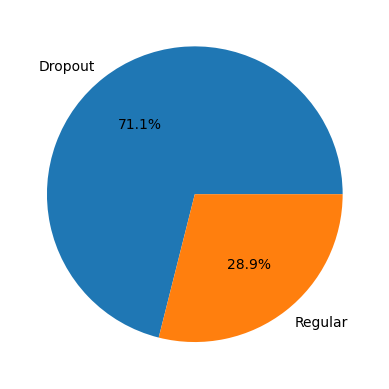

In [36]:
import matplotlib.pyplot as plt
labels = ['Dropout', 'Regular']

fig, ax = plt.subplots()
ax.pie(df.is_dropout.value_counts(), labels=labels, autopct='%1.1f%%')
plt.show()

In [37]:
df.ds_user_city.unique()

array([12, 13,  1,  5, 11,  3,  8,  6,  7, 14,  0, -1,  2, 10,  4,  9],
      dtype=int8)

In [38]:
import numpy as np
df.isin([np.inf, -np.inf]).sum()

ds_user_city                      0
n_days_since_firstaccess          0
n_days_since_lastaccess           0
n_assignments_flagged             0
n_assignments_mapped              0
n_forum_discussions_posted        0
n_quiz_abandoned                  0
n_quiz_finished                   0
vl_avg_quiz_speed                 0
vl_avg_graded_quiz_speed          0
vl_quiz_performance               0
n_interval_using                  0
n_days_using                      0
vl_avg_daily_activity             0
vl_user_engagement_by_interval    0
vl_user_engagement_intra_day      0
n_user_interactions               0
n_days_discussion_engagement      0
n_days_quiz_engagement            0
n_discussion_engagement           0
n_quiz_engagement                 0
n_questions_answered              0
n_questions_rigth                 0
n_questions_wrong                 0
n_questions_partial               0
vl_user_performance               0
vl_avg_questions_by_day           0
vl_grades_engagement        

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# , "n_days_since_lastaccess", "n_days_since_firstaccess"
X = df.drop(columns=["is_dropout", "n_days_since_lastaccess", "n_days_since_firstaccess"])
y = df.is_dropout

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=df.is_dropout)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8493150684931506

In [41]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='binary')

0.9615384615384616

In [42]:
from sklearn.metrics import precision_recall_fscore_support

# Precision, Recall, f-betascore
precision_recall_fscore_support(y_test, y_pred, average='binary')

(0.847457627118644, 0.9615384615384616, 0.9009009009009009, None)

Text(0.5, 0, 'Random Forest Feature Importance')

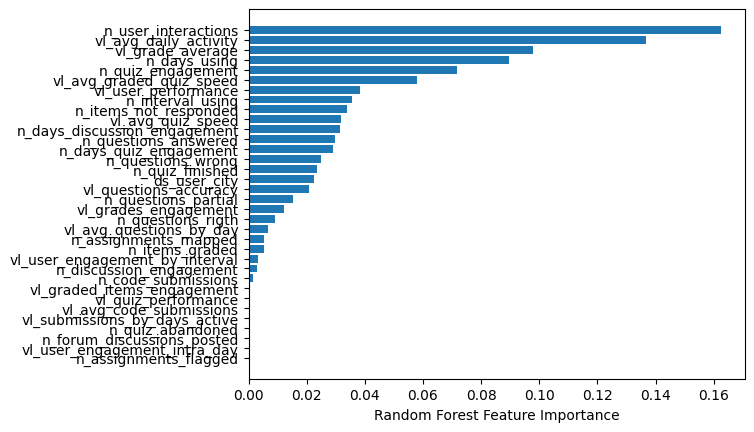

In [43]:
# plt.barh(X.columns, clf.feature_importances_)
sorted_idx = clf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Elapsed time to compute the importances: 0.006 seconds


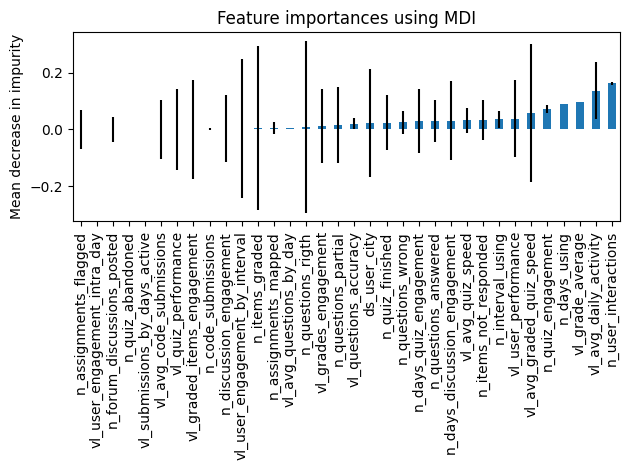

In [44]:
import time

start_time = time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.sort_values().plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

plt.rcParams['figure.figsize'] = [10, 10]


plt.show()

Text(0.5, 0, 'Permutation Importance')

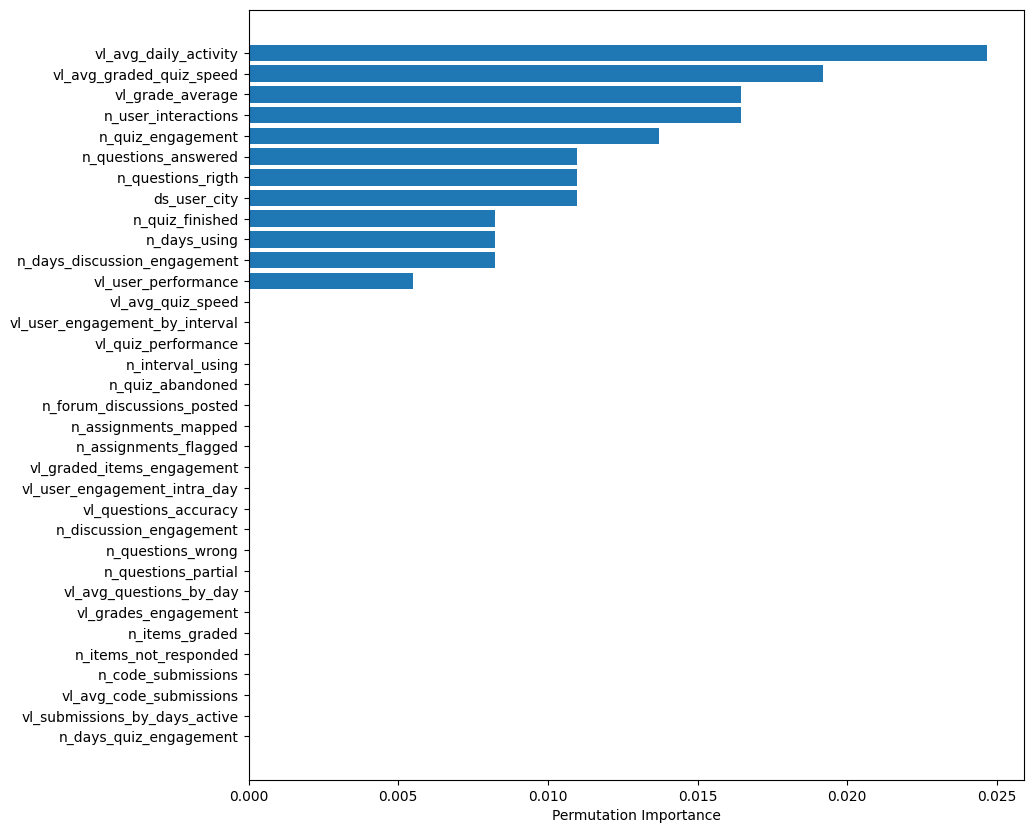

In [45]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(clf, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [46]:
%pip install shap


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


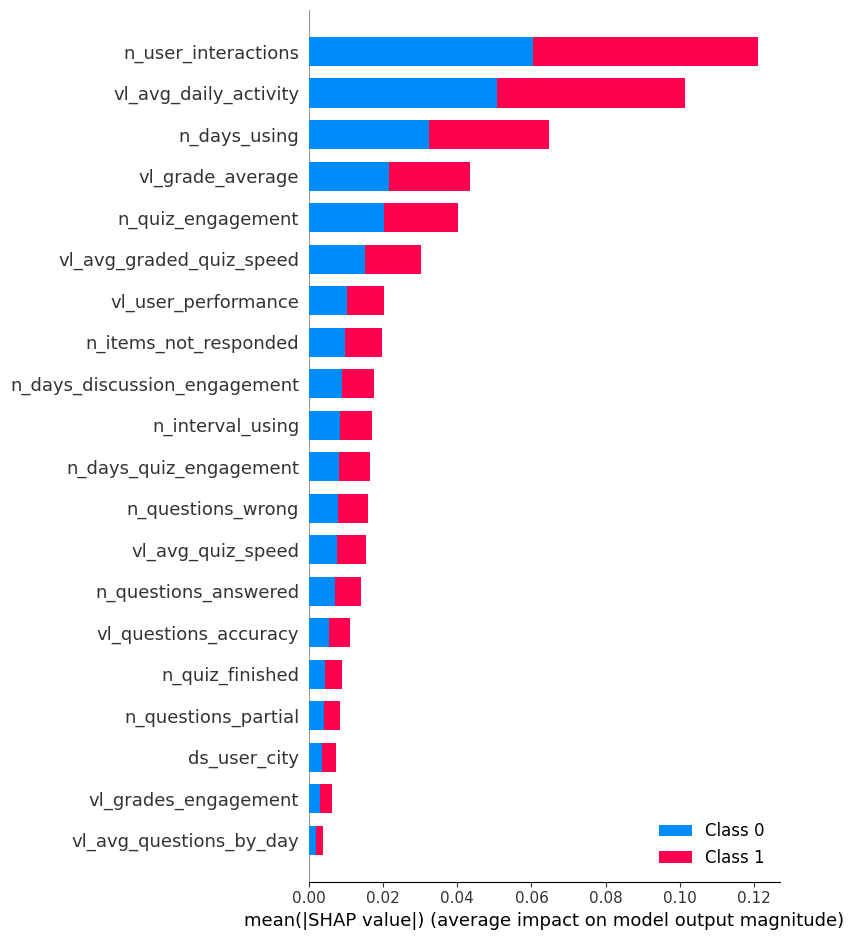

In [47]:
import shap

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")

# Decision tree

In [48]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier(max_depth=5)
clf_tree = clf_tree.fit(X_train, y_train)

y_tree_pred = clf_tree.predict(X_test)

print(accuracy_score(y_test, y_tree_pred))
print(precision_recall_fscore_support(y_test, y_tree_pred, average='binary'))

0.8767123287671232
(0.8909090909090909, 0.9423076923076923, 0.9158878504672897, None)


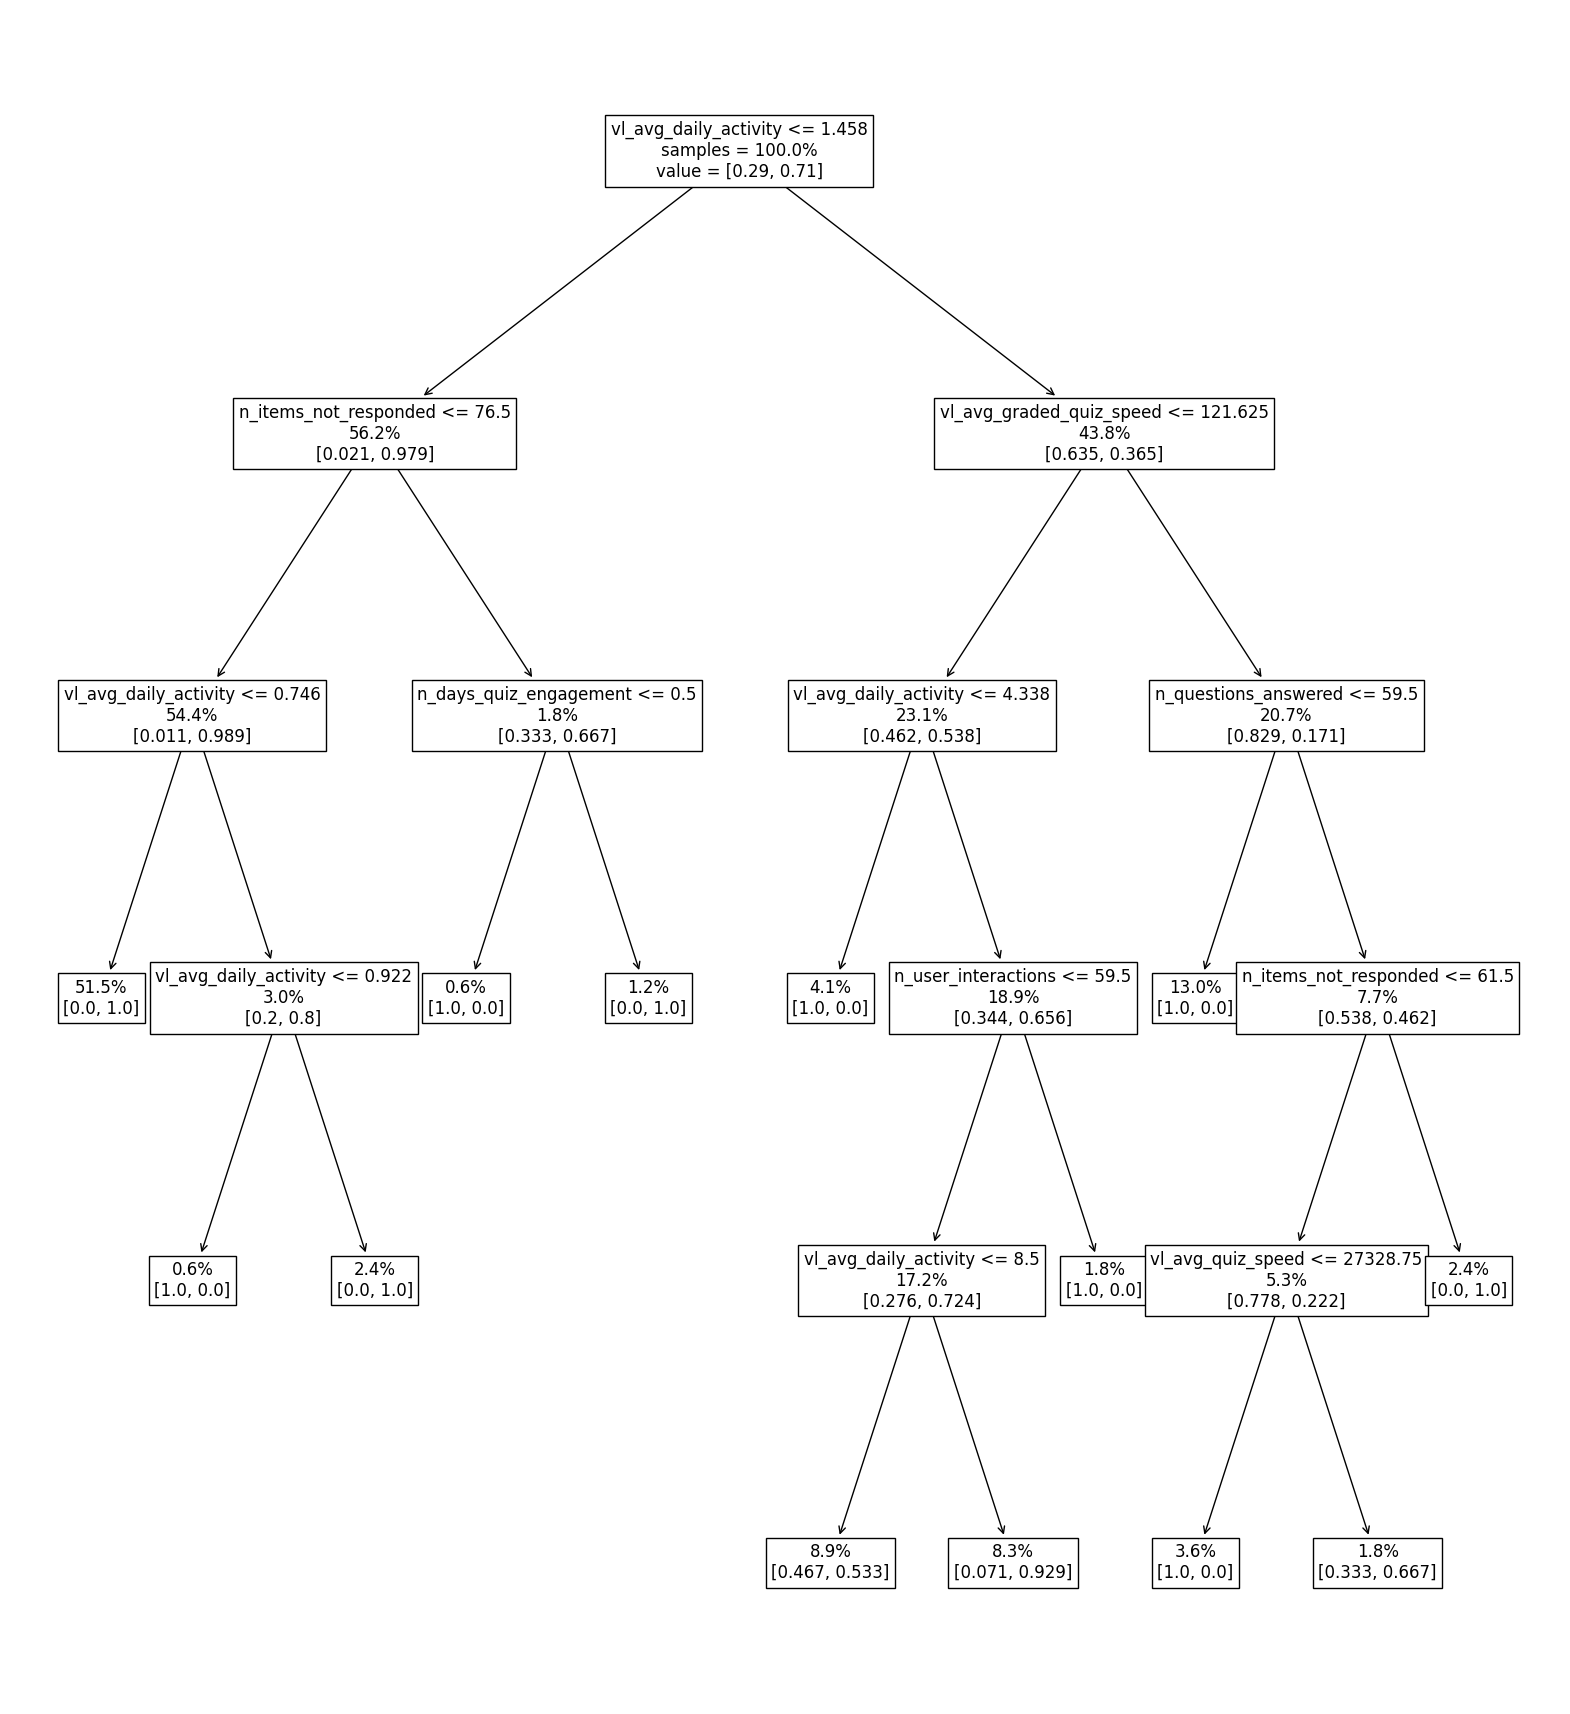

In [49]:
plt.figure(figsize=(20,22))
tree.plot_tree(clf_tree, feature_names=X.columns, impurity=False, fontsize=12, proportion=True, label='root')
plt.show()

In [50]:
perfil_regular = df.where((df.vl_avg_daily_activity > 1.458) & (df.vl_avg_graded_quiz_speed > 121.625))

In [51]:
perfil_regular.is_dropout.value_counts()

0.0    40
1.0     9
Name: is_dropout, dtype: int64

In [52]:
%pip install plotly


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [53]:
df[["vl_avg_daily_activity", "n_days_quiz_engagement", "n_items_not_responded", "vl_avg_quiz_speed", "vl_grade_average"]].describe()

# df["vl_grade_average_100"] = df["vl_grade_average"] * 100

vl_avg_daily_activity  n_days_quiz_engagement  n_items_not_responded  \
count             242.000000              242.000000             242.000000   
mean                9.248844                2.723140              23.995868   
std                20.543091               12.449141              65.704639   
min                 0.000000                0.000000               0.000000   
25%                 0.000000                0.000000               0.000000   
50%                 0.103250                0.000000               0.000000   
75%                 8.000000                1.000000              45.250000   
max               137.725700              133.000000             716.000000   

       vl_avg_quiz_speed  vl_grade_average  
count         242.000000        242.000000  
mean         7027.829234          0.251246  
std         40534.347371          0.423196  
min             0.000000          0.000000  
25%             0.000000          0.000000  
50%             0.000000          0.000000  
75%            60.250000          0.624709  
max        432769.500000          1.000000

In [54]:
df = pd.read_csv("enter_tech_processed.csv")

In [55]:
df

ds_user_city  n_days_since_firstaccess  n_days_since_lastaccess  \
0              12                       416                        5   
1              13                       416                       10   
2              12                       382                        0   
3              13                       390                        0   
4               1                       383                       21   
..            ...                       ...                      ...   
237            12                     19612                    19612   
238            12                         5                        5   
239            12                     19612                    19612   
240            12                     19612                    19612   
241            12                     19612                    19612   

     n_assignments_flagged  n_assignments_mapped  n_forum_discussions_posted  \
0                        0                     9                           9   
1                        0                     3                          11   
2                        0                     0                           0   
3                        0                    35                           9   
4                       11                    27                           2   
..                     ...                   ...                         ...   
237                      0                     0                           0   
238                      0                     0                           0   
239                      0                     0                           0   
240                      0                     0                           0   
241                      0                     0                           0   

     n_quiz_abandoned  n_quiz_finished  vl_avg_quiz_speed  \
0                   3                2           224.0000   
1                   0                4           127.5000   
2                   0                0             0.0000   
3                   0                1            20.0000   
4                   0               27        134816.2593   
..                ...              ...                ...   
237                 0                0             0.0000   
238                 0                1           765.0000   
239                 0                0             0.0000   
240                 0                0             0.0000   
241                 0                0             0.0000   

     vl_avg_graded_quiz_speed  ...  vl_grades_engagement  n_items_graded  \
0                    224.0000  ...                0.0000               1   
1                    166.3333  ...                0.0252              13   
2                      0.0000  ...                0.0000               0   
3                     20.0000  ...                0.0000               1   
4                 363847.7000  ...                0.1172              50   
..                        ...  ...                   ...             ...   
237                    0.0000  ...                0.0000               0   
238                  765.0000  ...                0.0000               1   
239                    0.0000  ...                0.0000               0   
240                    0.0000  ...                0.0000               0   
241                    0.0000  ...                0.0000               0   

     n_items_not_responded  vl_grade_average  n_code_submissions  \
0                      276          1.000000                   0   
1                      451          0.589744                  61   
2                      214          0.000000                   0   
3                      263          1.000000                   0   
4                      141          0.429848                   0   
..                     ...               ...                 ...   
237                      0          0.000000             

In [56]:
import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df['is_dropout'],
                   colorscale = [[0,'purple'],[1,'gold']]),
        dimensions = list([
            dict(range = [0,138],
                constraintrange = [4,8],
                label = 'AVG daily activity', values = df['vl_avg_daily_activity']),
            dict(range = [0,200],
                label = 'Items not responded', values = df['n_items_not_responded'])
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

In [57]:
df["vl_grade_average_times_100"] = df["vl_grade_average"] * 100
df["n_quiz_finished_times_100"] = df["n_quiz_finished"] * 100
df["n_questions_answered_times_10"] = df["n_questions_answered"] * 10

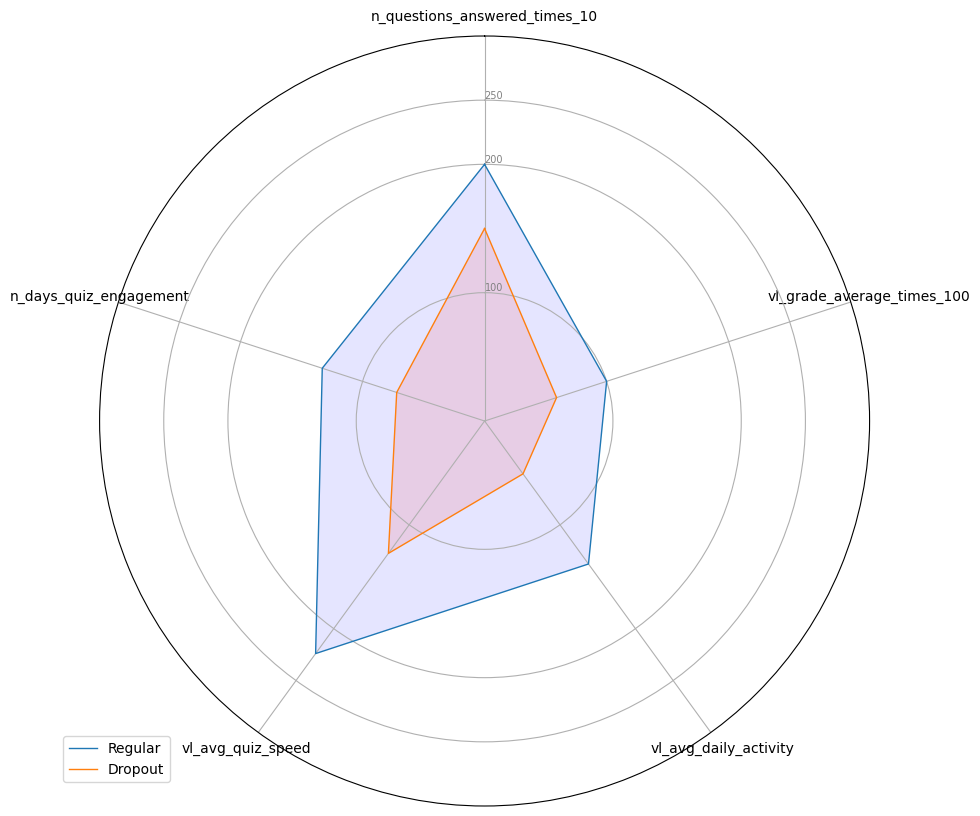

In [58]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
# df = pd.DataFrame({
# 'group': ['A','B','C','D'],
# 'var1': [38, 1.5, 30, 4],
# 'var2': [29, 10, 9, 34],
# 'var3': [8, 39, 23, 24],
# 'var4': [7, 31, 33, 14],
# 'var5': [28, 15, 32, 14]
# })

df_radar = df[["is_dropout", "n_questions_answered_times_10", "vl_grade_average_times_100", "vl_avg_daily_activity", "vl_avg_quiz_speed", "n_days_quiz_engagement"]]
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df_radar)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([100,200,250], ["100","200","250"], color="grey", size=7)
plt.ylim(0,300)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df_radar.loc[0].drop('is_dropout').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Regular")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df_radar.loc[1].drop('is_dropout').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Dropout")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

In [59]:
%pip install ydata-profiling


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [60]:
# from ydata_profiling import ProfileReport

In [61]:
# profile = ProfileReport(df, title="Profiling Report")

In [62]:
# profile

In [63]:
import seaborn as sns

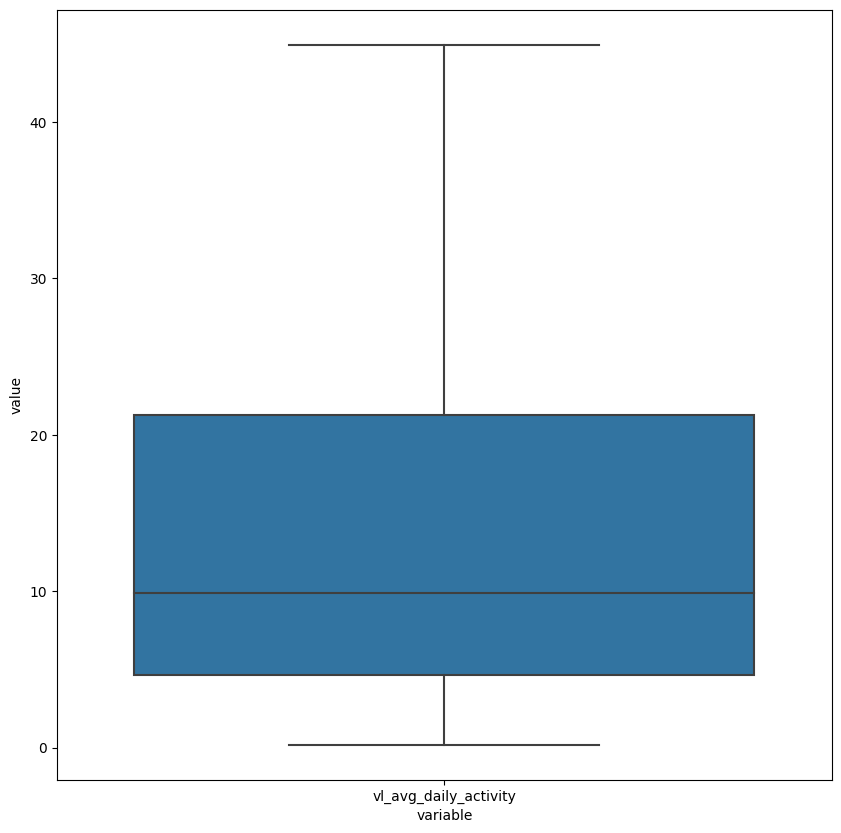

In [74]:
#melt data frame into long format
df_melted = pd.melt(df[["vl_avg_daily_activity"]].where(df.is_dropout == False))

sns.boxplot(x='variable', y='value', data=df_melted, showfliers=False)
plt.show()

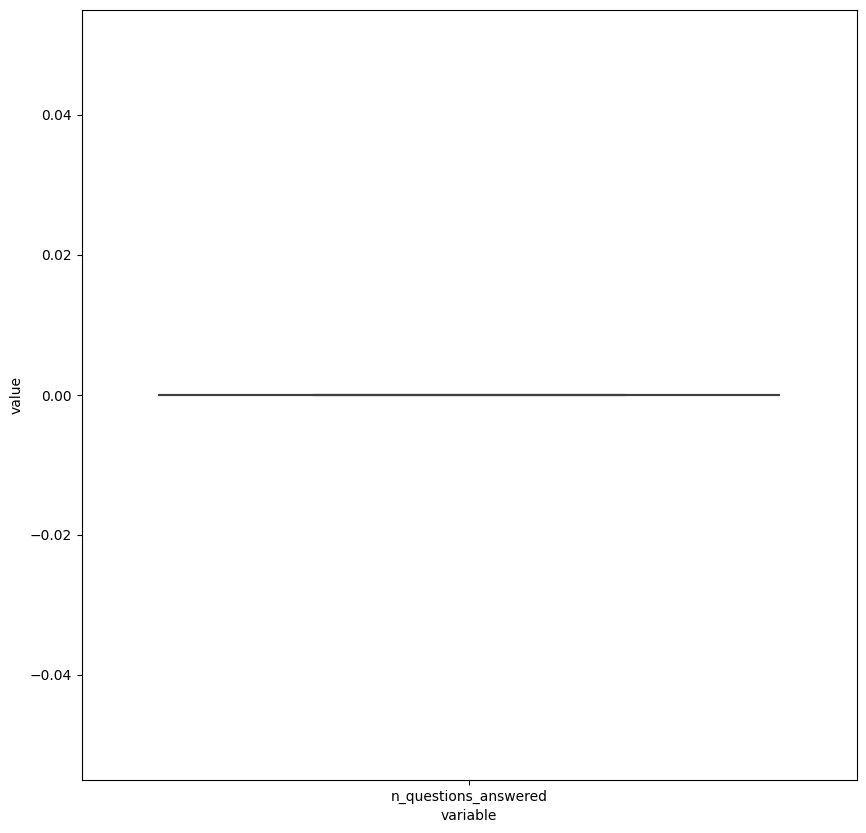

In [79]:
#melt data frame into long format
df_melted = pd.melt(df[["n_questions_answered"]].where(df.is_dropout == True))

sns.boxplot(x='variable', y='value', data=df_melted, showfliers=False)
plt.show()

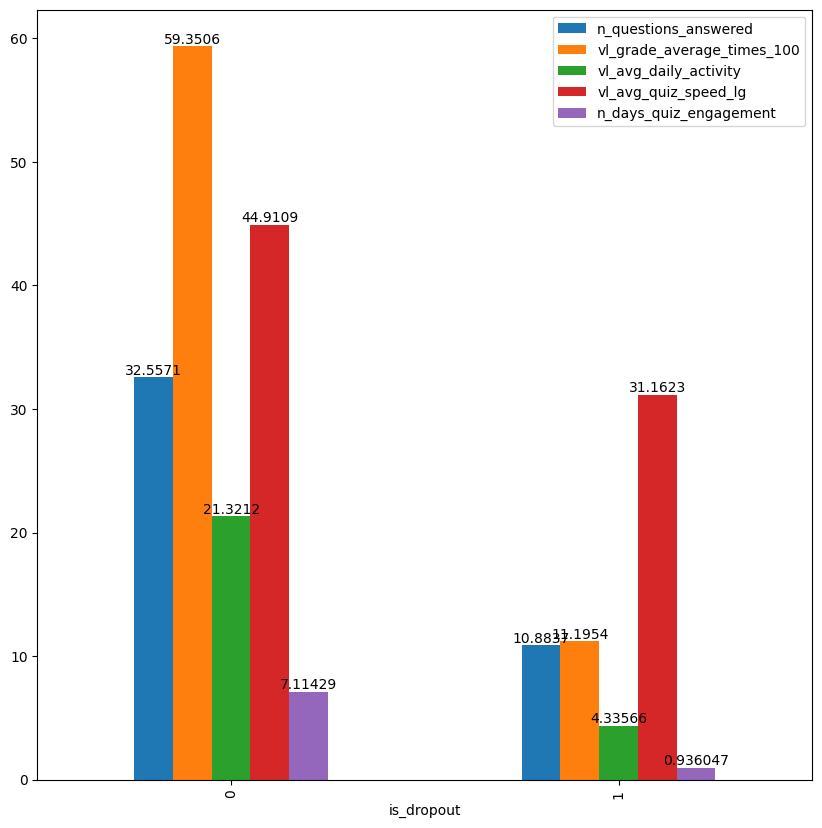

In [103]:
df["vl_avg_quiz_speed_lg"] = df["vl_avg_quiz_speed"] / 200

avgs = df[["is_dropout", "n_questions_answered", "vl_grade_average_times_100", "vl_avg_daily_activity", "vl_avg_quiz_speed_lg", "n_days_quiz_engagement"]].groupby("is_dropout").mean().plot(kind="bar")

for container in avgs.containers:
    avgs.bar_label(container)

In [101]:
# 